<a href="https://colab.research.google.com/github/naoya1110/DL_Lecture_202107/blob/main/Chapter05_MNIST_with_Simple_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 05: MNIST with Simple DNN

いよいよここからディープラーニングに入門します！最初の一歩として誰もが通る道である「手書き数字の画像分類（通称：MNISTチュートリアル）」に取り組んでみましょう。MNIST（エムニスト）という超有名なデータセットを使えばあっという間に超入門できます！

## 準備


### パッケージのインポート

最初に必要なパッケージをインポートします。新しく導入するのは[TensorFlow（テンソルフロー）](https://www.tensorflow.org/)というパッケージです。TensorFlowはGoogleが開発しているディープラーニング用のパッケージ（フレームワークとも呼ばれる）で，無料で使用することができます。他にはFacebookが開発している[PyTorch（パイトーチ）](https://pytorch.org/)というパッケージが有名です。PyTorchもGoogle Colabで使えますが，この講座ではTensorFlowを使用していきます。



In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(precision=3,  suppress=True)
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, InputLayer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from tensorflow.math import confusion_matrix

# trainX, trainYをさらに分離するために使用
from sklearn.model_selection import train_test_split

# TensorFlowのバージョンを確認
print("TensorFlow version: " + tf.__version__)

TensorFlow version: 2.5.0


## データの準備

### MNISTデータセットの読み込み
MNISTデータセットは
TensorFlowのコード1行でネット上から簡単に読み込むことができます。中身は以下の4種類になっています。

* **trainX** 学習用の入力データ
* **trainY** 学習用の出力データ
* **testX** テスト用の入力データ
* **testY** テスト用の出力データ

続けて，データの形やタイプを確認しておきましょう。

In [2]:
#自動的にネット上からデータがダウンロードする
(trainX, trainY), (testX, testY) = mnist.load_data()

# データの形とタイプを確認
print(f"trainX: Type {type(trainX)}, Shape {trainX.shape}")
print(f"trainY: Type {type(trainY)}, Shape {trainY.shape}")
print(f"testX: Type {type(testX)}, Shape {testX.shape}")
print(f"testY: Type {type(testY)}, Shape {testY.shape}")

11493376/11490434 [==============================] - 0s 0us/step
trainX: Type <class 'numpy.ndarray'>, Shape (60000, 28, 28)
trainY: Type <class 'numpy.ndarray'>, Shape (60000,)
testX: Type <class 'numpy.ndarray'>, Shape (10000, 28, 28)
testY: Type <class 'numpy.ndarray'>, Shape (10000,)


### データの確認
MNISTデータセットにどんなデータが入っているか，可視化して確認してみましょう。

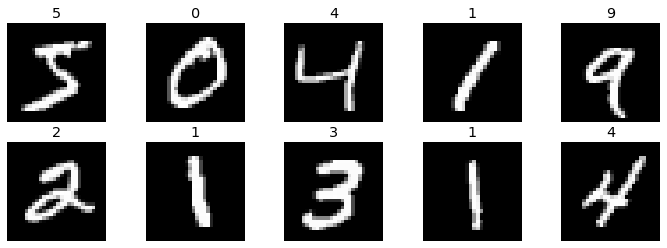

In [3]:
plt.figure(figsize=(12,4))
plt.rcParams["font.size"]=12

# 0-9番目のデータを表示
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(trainX[i], cmap="gray") # i番目のtrainXを画像として表示
    plt.axis("off") # 軸を表示しない
    plt.title(f"{trainY[i]}") # タイトルとしてi番目の正解値trainYを表示

0から9までの数字のデータがどのような割合で入っているか確認しましょう。

In [4]:
print("number   train data   test data")
print("-------------------------------")
for i in range(9):
    train_count = (trainY==i).sum()
    test_count = (testY==i).sum()
    print(f"{str(i).rjust(3)} {str(train_count).rjust(12)} {str(test_count).rjust(12)}")

number   train data   test data
-------------------------------
  0         5923          980
  1         6742         1135
  2         5958         1032
  3         6131         1010
  4         5842          982
  5         5421          892
  6         5918          958
  7         6265         1028
  8         5851          974


### 画像データの中身を確認
画像データも実際は数値の配列になっていることを確認しましょう。

In [5]:
# n番目のデータを指定する
n = 0

# 正解の数字を表示
print(f"この画像の数字は {trainY[n]} です")

# データを読み込んで表示する
pd.DataFrame(trainX[n])

この画像の数字は 5 です


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


### 入力データ（trainX, testX）の最大値と最小値を確認
入力データとなるtrainX, trainYは最大255, 最小0の8bit(分解能256)の数値の配列であることが分かります。

In [6]:
print("---trainX---")
print("最大値：", trainX.max()) 
print("最小値：", trainX.min()) 

print("\n---testX---")
print("最大値：", testX.max()) 
print("最小値：", testX.min()) 

---trainX---
最大値： 255
最小値： 0

---testX---
最大値： 255
最小値： 0


### 入力データ（trainX, testX）のフォーマットを変更する
今回構築するモデル（DNN, Deep Neural Network，ディープニューラルネットワーク）は全結合層（Dense Layer）のみを使用します。全結合層は一次元の配列のみを受け付けるため，それに合うように入力データのフォーマットを変更する必要があります。また，すべての値を255で割ることで最大値が1.0, 最小値が0.0となるように規格化します。このような処理は前処理（Preprocess）と呼ばれ，DNNを上手く学習させるために有効な手段です。

In [7]:
#二次元のデータを一次元に変更する
trainX_1d = trainX.reshape(-1, 784)
testX_1d = testX.reshape(-1, 784)

#最大が1.0となるように規格化する
trainX_1d = trainX_1d/trainX_1d.max()
testX_1d = testX_1d/testX_1d.max()

#表示して確認する
print("---trainX_1d---")
print("最大値：", trainX_1d.max())
print("最小値：", trainX_1d.min())
print("Shape：", trainX_1d.shape)

print("\n---testX_1d---")
print("最大値：", testX_1d.max())
print("最小値：", testX_1d.min())
print("Shape：", testX_1d.shape)

---trainX_1d---
最大値： 1.0
最小値： 0.0
Shape： (60000, 784)

---testX_1d---
最大値： 1.0
最小値： 0.0
Shape： (10000, 784)


### 出力データ（trainY, testY）のフォーマットを変更する

出力データも学習に合うようにフォーマットを変更します。trainY, testYにはもともとtrainX, testXの画像データに対応する整数（0, 1, 2, 3, 4 ...）が入っていますが，これをOne-hotベクトルと呼ばれる以下のような長さが10の配列に変換します。例えば，もともとの数値が3であれば，3番目の要素が1でその他が0となっていることに注目してください。

```
0 -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1 -> [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
2 -> [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
4 -> [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
5 -> [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
6 -> [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
7 -> [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
8 -> [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

整数をOne-hotベクトルに変更するには```to_categorical()```を使用します。

In [8]:
# One-hotベクトルに変更する
trainY_onehot = to_categorical(trainY)
testY_onehot = to_categorical(testY)

# trainYの最初の5個を表示して確認
pd.DataFrame(trainY_onehot).head(5)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### validX, validYを生成
trainX, trainYを分離して検証用データ（validX, validY）を生成します。```test_size=0.2```とした場合は，trainX, trainYの2割を検証用データとして使用することになります。

In [9]:
trainX_1d, validX_1d, trainY_onehot, validY_onehot = train_test_split(trainX_1d, trainY_onehot, test_size=0.2)

### 学習に使用するデータのshapeを確認
今回使用するデータはtrainX_1d, trainY_onehot, validX_1D, validY_onehot, testX_1d, testY_onehotです。shapeを確認しておきましょう。

In [10]:
print("Data shapes")
print("trainX_1d:", trainX_1d.shape)
print("trainY_onehot:", trainY_onehot.shape)
print("validX_1d:", validX_1d.shape)
print("validY_onehot:", validY_onehot.shape)
print("testX_1d:", testX_1d.shape)
print("testY_onehot:", testY_onehot.shape)

Data shapes
trainX_1d: (48000, 784)
trainY_onehot: (48000, 10)
validX_1d: (12000, 784)
validY_onehot: (12000, 10)
testX_1d: (10000, 784)
testY_onehot: (10000, 10)


## 学習

### モデルの構築
ここからいよいよモデル（DNN, Deep Neural Network）を構築します。以下は全結合層の中間層が2層あるシンプルなモデルの例です。入力データのサイズは長さが784(28x28)の一次元配列になっています。出力データのサイズ長さが10(数字のOne-hotベクトル)の一次元配列になっています。最後に可視化することで意図したモデルが構築できているか確認しましょう。

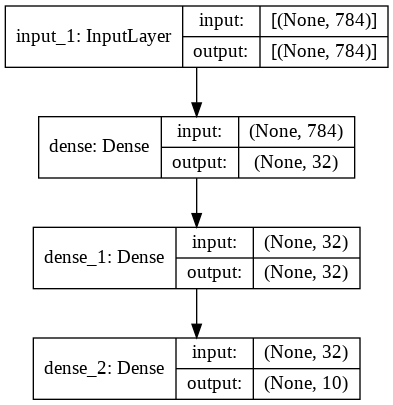

In [11]:
# モデルの初期化
model = Sequential()

# 入力層
model.add(InputLayer(input_shape=(784,)))

# 中間層（１層目）
model.add(Dense(units=32, activation="relu"))

# 中間層（２層目）
model.add(Dense(units= 32, activation="relu"))

# 出力層
model.add(Dense(units=10, activation="softmax"))

# 構築したモデルを可視化して確認
plot_model(model, show_shapes=True)

構築したモデルは次の方法でも確認できます。この方法では，学習させるパラメータの数を確認することもできます。

In [12]:
# 構築したモデルを別の方法で可視化して確認
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


### モデルのコンパイル

モデルを学習させるためにコンパイルします。指定する主なパラメータは以下の通りです。

* **loss** 損失関数は何を使うか？分類問題の場合は，"categorical_crossentropy"がほとんど。
* **optimizer** 最適化関数は何を使うか？"adam"のほかに，"sgd", "RMSprop"などが使える
* **metrics** 評価関数。パラメータの最適化には用いられない。

In [13]:
# モデルをコンパイルする
model.compile(
                loss="categorical_crossentropy",
                optimizer="adam", 
                metrics=["accuracy"]
              )

### モデルの学習（トレーニング）

モデルを学習させます。```model.fit()```だけでも学習できますが，```history=model.fit()```としておくことで後から学習経過を可視化できます。指定する主なパラメータは以下の通りです。

* **trainX** 学習用データの入力データ，今回の場合は長さが784の一次元配列
* **trainY** 学習用データの出力データ，今回の場合は0~9のone-hot表現）
* **batch_size** 何個のデータごとにパラメータを更新するか？1バッチあたりのデータ数
* **epochs** すべての学習用データを何回通りみるか？
* **validation_data** 検証用データ
* **shuffle** 学習用データを見る順番をシャッフルするか？
* **verbose** 学習経過の表示方法。0,1,2が選択可能。

In [14]:
history = model.fit(
                    trainX_1d, trainY_onehot,
                    batch_size=64,
                    epochs=10,
                    validation_data=(validX_1d, validY_onehot),
                    shuffle=True,
                    verbose=1
                   )

Epoch 1/10
750/750 [==============================] - 3s 3ms/step - loss: 0.4522 - accuracy: 0.8691 - val_loss: 0.2288 - val_accuracy: 0.9330
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2087 - accuracy: 0.9384 - val_loss: 0.1776 - val_accuracy: 0.9473
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1637 - accuracy: 0.9523 - val_loss: 0.1489 - val_accuracy: 0.9582
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1381 - accuracy: 0.9586 - val_loss: 0.1430 - val_accuracy: 0.9565
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1194 - accuracy: 0.9637 - val_loss: 0.1265 - val_accuracy: 0.9626
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.1055 - accuracy: 0.9681 - val_loss: 0.1212 - val_accuracy: 0.9632
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0929 - accuracy: 0.9718 - val_loss: 0.1172 - val_accuracy: 0.9635
Epoch 

### 学習経過の確認
学習経過を可視化して上手く学習できているか？過学習などが起こっていないかを確認しましょう。

Text(0, 0.5, 'Accuracy & Loss')

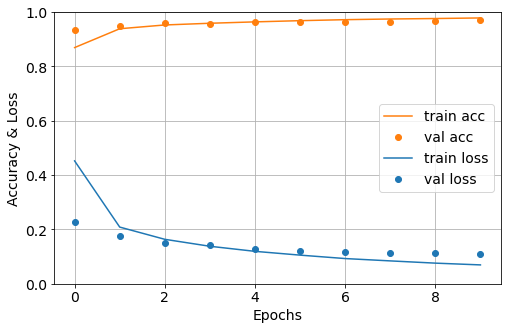

In [15]:
plt.figure(figsize=(8,5))
plt.rcParams["font.size"]=14

epoch = history.epoch
train_acc = history.history["accuracy"]
train_loss = history.history["loss"]
val_acc = history.history["val_accuracy"]
val_loss = history.history["val_loss"]

plt.plot(epoch, train_acc, label="train acc", c="#ff7f0e")
plt.plot(epoch, val_acc, marker="o", lw=0, label="val acc", c="#ff7f0e")

plt.plot(epoch, train_loss, label="train loss", c="#1f77b4")
plt.plot(epoch, val_loss, marker="o", lw=0, label="val loss", c="#1f77b4")

plt.ylim(0, 1)
#plt.xlim(-10, 210)
plt.legend()
plt.grid()

plt.xlabel("Epochs")
plt.ylabel("Accuracy & Loss")

## 学習済みモデルの評価

### 学習済みモデルを使ってテスト用データ（testX）から数字を推論
次の1行でテスト用データに対して推論を行います。

In [16]:
# 推論
predY_onehot = model.predict(testX_1d)

N番目のtestXに対する推論結果を確認してみましょう。推論結果の```predY```も長さが10の一次元配列になっています。

500番目の画像データに対する推論結果
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


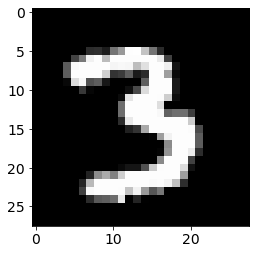

In [17]:
# N番目を指定
N = 500

# N番目の画像データを表示
plt.imshow(testX[N], cmap="gray")

# N番目の推論結果を表示
print(f"{N}番目の画像データに対する推論結果")
print(predY_onehot[N])

推論結果である```predY```の10個の数値は，入力された画像データが0~9のどの数字であるかという確率を表しています。したがって，最も高い確率を示す要素の指標（順番）が元の画像データの数字だと言えます。以下のコードで```predY```から実際の数字を求めます。

In [18]:
# 推論結果（確率）が最大となる指標を求める
predY = np.argmax(predY_onehot, axis=1)

# N番目の数字を確認する
print(predY[N])

3


### 推論結果の一部を可視化
学習済みモデルを使ってtestXのデータから推論した結果の一部を表示してみましょう。Truthが正解値，Predが推論結果です。

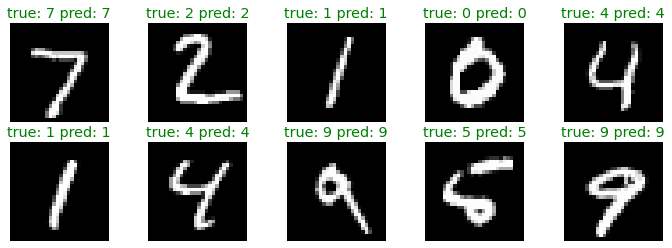

In [19]:
plt.figure(figsize=(12,4))
plt.rcParams["font.size"]=12

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(testX[i], cmap='gray')
    plt.axis("off")
    true_index = testY[i]
    pred_index = predY[i]
    if true_index == pred_index:
        color = "green"
    else:
        color = "red"
    title = f"true: {true_index} pred: {pred_index}"
    plt.title(title, color=color)

### モデルの精度を検証
全てのテスト用データに対するモデルの精度を検証します。

In [20]:
score = model.evaluate(testX_1d, testY_onehot)
print("Test Accuracy = {:.2f}".format(score[1]))

313/313 [==============================] - 0s 1ms/step - loss: 0.1174 - accuracy: 0.9656
Test Accuracy = 0.97


### 混同行列
モデルの精度をより詳しく検証するためには混同行列を使います。

Text(0.5, 38.0, 'Prediction')

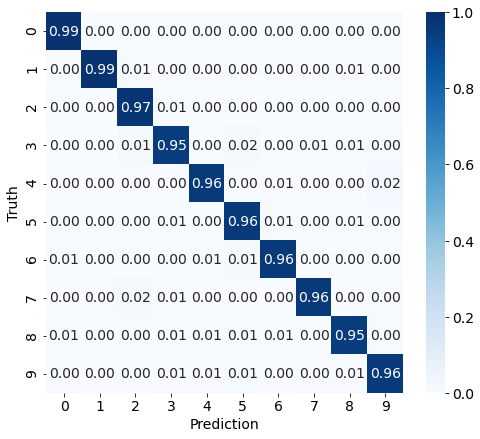

In [21]:
cmx = np.array(confusion_matrix(testY, predY))

cmx_pct = np.zeros(cmx.shape)

for i in range(cmx.shape[0]):
    for j in range(cmx.shape[1]):
        cmx_pct[i, j] = cmx[i, j]/cmx[i, :].sum()

plt.rcParams["font.size"]=14
plt.figure(figsize=(8,7))
sns.heatmap(cmx_pct, annot=True, fmt=".2f", cmap="Blues", vmin=0, vmax=1)
plt.ylabel("Truth")
plt.xlabel("Prediction")